In [4]:
import os
import logging
import datetime
import numpy as np
import scipy.stats

from excursion import ExcursionProblem, Learner
import excursion.plotting.threedim as plots
import excursion.optimize as optimize

logging.basicConfig(level = logging.INFO)
np.warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
truth0 = lambda X: np.atleast_1d(scipy.stats.multivariate_normal.pdf(X,mean = [0.5,0.5,0.5], cov = np.diag([0.2,0.3,0.4])))
scandetails = ExcursionProblem([truth0], thresholds = [0.2], ndim = 3)
learner = Learner(scandetails)

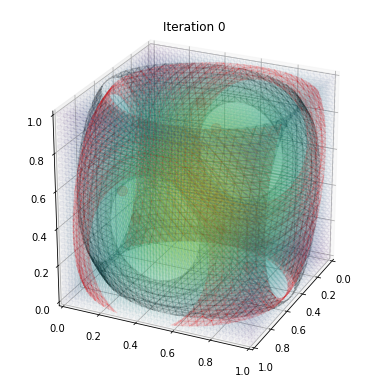

next


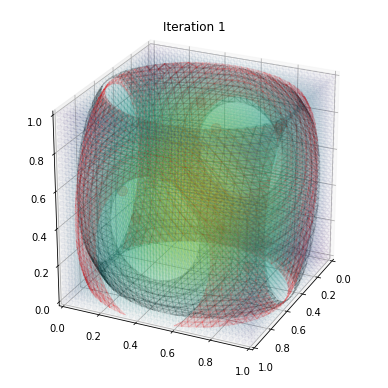

next


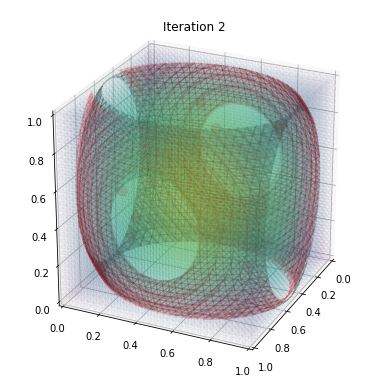

next


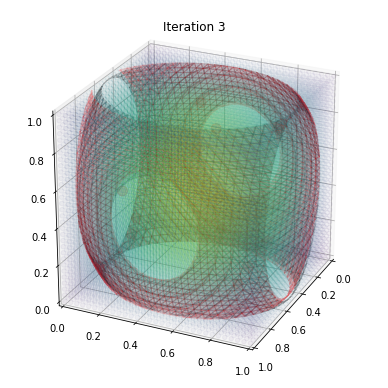

next


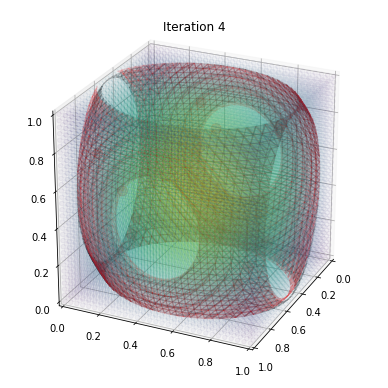

next


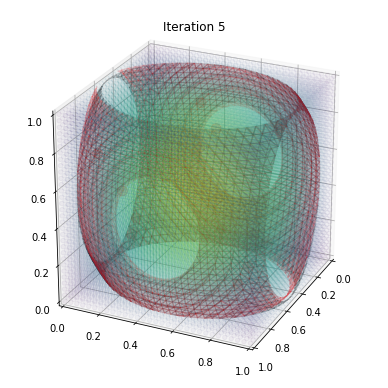

next


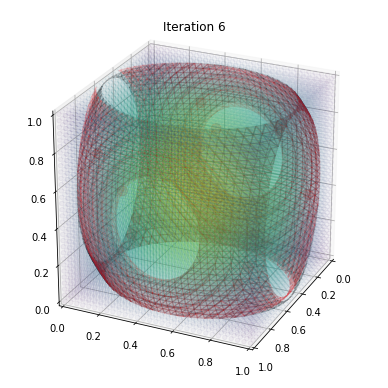

next


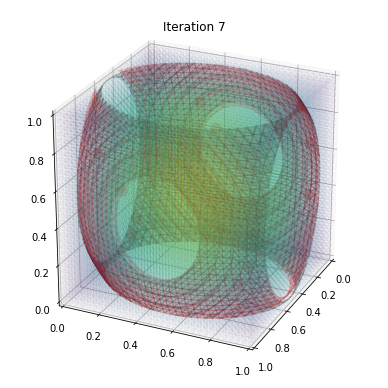

next


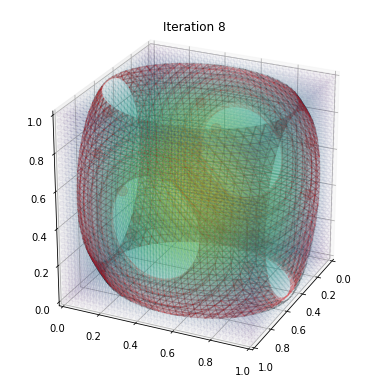

next


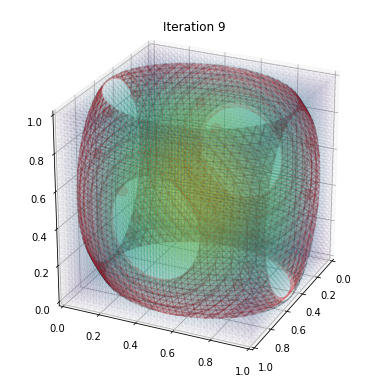

next


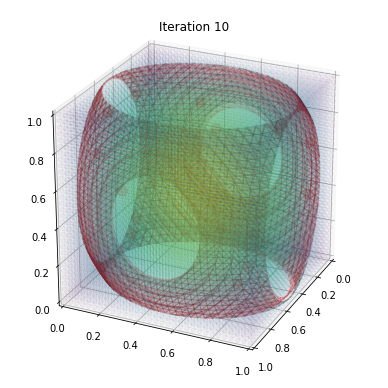

next


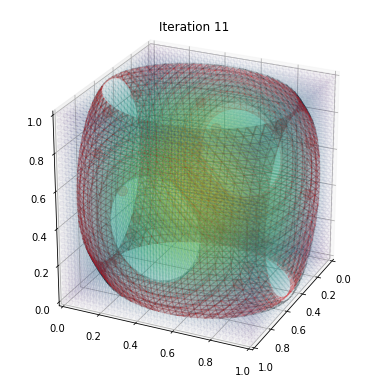

next


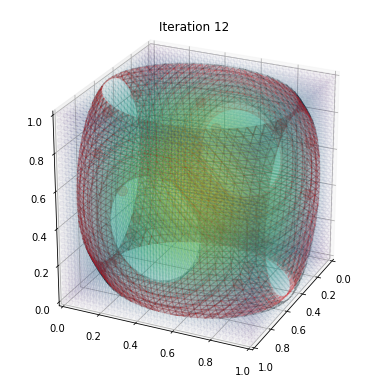

next


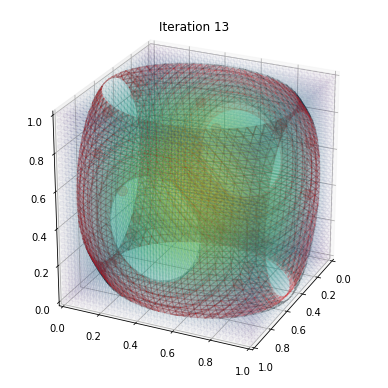

next


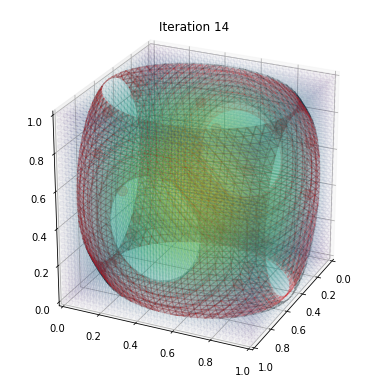

next


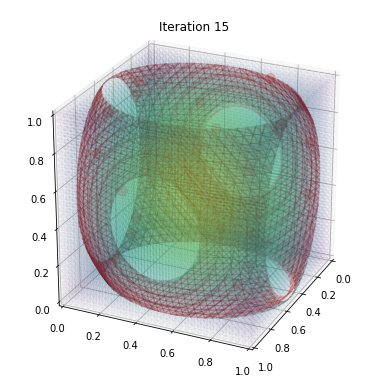

next


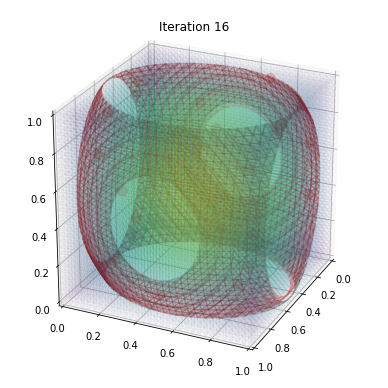

next


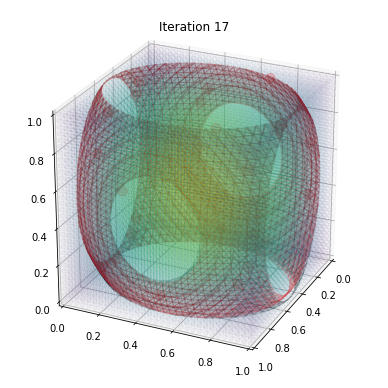

next


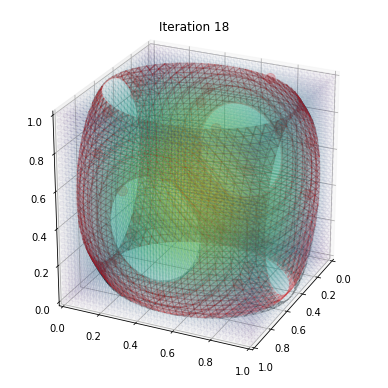

next


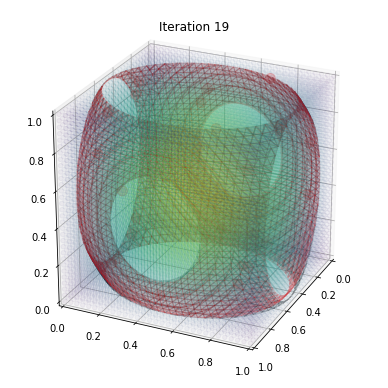

next


In [11]:
def plot_and_save(workdir, index, *args,**kwargs):
    fig, ax = plt.subplots(1, subplot_kw={'projection': '3d'})
    axarr = [ax]
    fig.set_size_inches(5.5, 5.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,*args,**kwargs, view_init = (25,25), evaluate_truth=True)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

N_UPDATES = 20
N_BATCH = 1

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)

learner.initialize(n_init = 10)
for index in range(N_UPDATES):
    plot_and_save(workdir, index, learner.gps,learner.X,learner.y_list,learner.scandetails)
    print('next')
    newX = learner.suggest()
    learner.evaluate_and_tell(newX)